In [1]:
import sys
sys.path.append('../data_generated_library')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import credit_card_data

import torch.nn as nn
import torch
import torch.nn.functional as F
# from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

In [2]:
train_data = pickle.load(open("../data_2/train_data", "rb"))
train_label = pickle.load(open("../data_2/train_label", "rb"))

In [3]:
test_data = pickle.load(open("../data_2/test_data", "rb"))
test_label = pickle.load(open("../data_2/test_label", "rb"))

In [4]:
all_data = np.concatenate([train_data,test_data],axis = 0)
all_label = np.concatenate([train_label,test_label],axis = 0)

In [5]:
def encode(z):
    res = 0
    for i in z:
        res *= 2
        res += i
    return res

data = {}
for i in range(len(all_label)):
    x = encode(all_data[i])
    if x in data:
        data[x]['count'] += 1
        data[x]['label'] += all_label[i]
    else:
        data[x] = {'count': 1, 'label': all_label[i]}

y_pred = []
for z in test_data:
    x = encode(z)
    if x in data:
        y_pred.append(data[x]['label'] / data[x]['count'])
    else:
        y_pred.append(0)
y_pred = np.array(y_pred)

In [6]:
cnt = 0
for k, v in data.items():
    if v['count'] == 1:
        cnt += 1
cnt

2636

In [7]:
def criteria(pred, label, threshold):
    recall = []
    precision = []
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    TP += ((pred > threshold).flatten()&(label == 1)).sum()
    TN += ((pred < threshold).flatten()&(label == 0)).sum()
    FP += ((pred > threshold).flatten()&(label == 0)).sum()
    FN += ((pred < threshold).flatten()&(label == 1)).sum()
    return TP, TN, FP, FN

def plot(pred, label, func):
    xs = []
    ys = []
    steps = 1000
    l, r = pred.min(), pred.max()
    for i in range(steps):
        t = l + (r - l) * i / steps
        x, y = func(pred, label, t)
        xs.append(x)
        ys.append(y)
    plt.plot(xs, ys)
    plt.xlim(0,1)
    plt.ylim(0,1)

def get_pr(pred, label, func):
    xs = []
    ys = []
    steps = 1000
    l, r = pred.min(), pred.max()
    for i in range(steps):
        t = l + (r - l) * i / steps
        x, y = func(pred, label, t)
        xs.append(x)
        ys.append(y)
    return xs, ys

In [8]:
def precision_recall(pred, label, threshold):
    TP, TN, FP, FN = criteria(pred, label, threshold)
    recall = TP / (TP + FN)
    precision = TP / (TP + FP)
    return recall, precision

def precision_recall_plot(pred, label):
    plot(pred, label, precision_recall)

In [9]:
test_label = np.array(test_label)
precision_recall(y_pred, test_label, 0.5)

(0.9253012048192771, 0.9552238805970149)

In [10]:
len(data)

2984

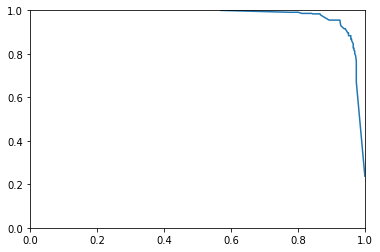

In [11]:
precision_recall_plot(y_pred, test_label)
plt.show()

In [12]:
r,p = get_pr(y_pred,test_label,precision_recall)

In [13]:
import pickle
f= open('upperbound_recall_2','wb')
pickle.dump(r,f)
f.close()
f= open('upperbound_precision_2','wb')
pickle.dump(p,f)
f.close()